In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [78]:
def compare_weather_day_forecast(historical_df, forecast_df, date_column, value_column):
    """
    Compare historical weather data with the current forecast using a graph with a confidence interval.

    Parameters:
    - historical_df: DataFrame containing historical weather data.
    - forecast_df: DataFrame containing the current weather forecast data.
    - date_column: Name of the column in both DataFrames containing the date information.
    - value_column: Name of the column in both DataFrames containing the weather variable to compare.

    Returns:
    - None (the function will display the graph).
    """
    # Clean data and merge the two DataFrames on the date_column
    historical_df['date'] = historical_df['date'].dt.tz_localize('UTC')
    historical_df = historical_df.rename(columns={
        'date': 'validTime',
        'temperature_2m': 'temperature',
        'relative_humidity_2m': 'relativeHumidity',
        'dew_point_2m': 'dewpoint',
        'wind_speed_10m': 'windSpeed'
    })
    print(forecast_df)
    columns_to_drop = ['rain', 'Unnamed: 0']
    historical_df = historical_df.drop(columns=columns_to_drop, errors='ignore')

    #print(historical_data)
    #all_column_types = historical_df.dtypes
    #print(all_column_types)

    historical_df['date'] = historical_df['validTime'].dt.strftime("%m-%d")
    
    print(historical_df)
    
    columns_to_drop = ['windDirection', 'Unnamed: 0', 'minTemperature', 'maxTemperature']
    forecast_df = forecast_df.drop(columns=columns_to_drop, errors='ignore')
    forecast_df['date'] = forecast_df['validTime'].dt.strftime("%m-%d")
    #forecast_df['date'] = forecast_df['validTime'].apply(
    #    lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S%z").strftime("%m-%d")
    #)

    #merged_df = pd.merge(historical_df, forecast_df, on='validTime', suffixes=('_historical', '_forecast'))
    merged_df = pd.merge(historical_df, forecast_df, on='date', suffixes=('_historical', '_forecast'))
    #print(merged_df)
    


    # Create the plot
    ax = sns.lineplot(x=merged_df[date_column], y=merged_df[value_column + '_historical'], label='Historical', errorbar=None, color='blue')
    sns.lineplot(x=merged_df[date_column], y=merged_df[value_column + '_historical'], errorbar='sd', color='blue', alpha=0.2)
    sns.lineplot(x=merged_df[date_column], y=merged_df[value_column + '_forecast'], label='Forecast', errorbar='sd', color='red')

    # Set the y-axis limit
    ax.set_ylim(bottom=0)  # This sets the lower limit of y-axis to 0

    # Set plot labels and title
    plt.xlabel('Date')
    plt.ylabel(value_column)
    plt.title(f'Comparison of Historical Data and Forecast for {value_column}')

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

# Example usage:
# historical_data = pd.read_csv('historical_weather.csv')
# forecast_data = pd.read_csv('forecast_weather.csv')
# compare_weather_forecast(historical_data, forecast_data, 'date', 'temperature')

                    validTime  temperature  dewpoint  maxTemperature  \
0   2023-12-15 16:00:00+00:00         31.0      26.0            45.0   
1   2023-12-15 17:00:00+00:00         35.0      27.0            45.0   
2   2023-12-15 18:00:00+00:00         41.0      29.0            45.0   
3   2023-12-15 19:00:00+00:00         42.0      30.0            45.0   
4   2023-12-15 20:00:00+00:00         43.0      29.0            45.0   
..                        ...          ...       ...             ...   
175 2023-12-22 23:00:00+00:00         46.0      35.0            48.0   
176 2023-12-23 00:00:00+00:00         45.0      35.0            48.0   
177 2023-12-23 01:00:00+00:00         43.0       NaN            48.0   
178 2023-12-23 02:00:00+00:00         41.0       NaN            48.0   
179 2023-12-23 03:00:00+00:00         39.0       NaN             NaN   

     minTemperature  relativeHumidity  windDirection  windSpeed  \
0               NaN              81.0          130.0      3.704   
1

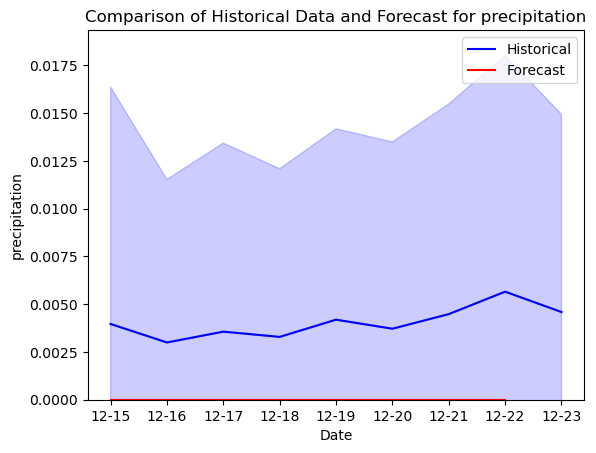

In [79]:
#historical_data = pd.read_csv(r'C:/Users/camer/Documents/Stat386/weather386/weather_history_csv/hourly_hist.csv')
#forecast_data = pd.read_csv(r'C:/Users/camer/Documents/Stat386/weather386/forecast_csv/combined.csv')

historical_data = pd.read_pickle(r'/Users/Davis/Documents/School/386/weather386/weather_history_csv/hourly_hist.pkl')
forecast_data = pd.read_pickle(r'/Users/Davis/Documents/School/386/weather386/forecast_csv/combined.pkl')

#historical_data.head(5)
compare_weather_day_forecast(historical_data, forecast_data, 'date', 'precipitation')

In [95]:
def compare_weather_hour_forecast(historical_df, forecast_df, value_column, target_date):
    """
    Compare historical weather data with the current forecast using a graph with a confidence interval.

    Parameters:
    - historical_df: DataFrame containing historical weather data.
    - forecast_df: DataFrame containing the current weather forecast data.
    - date_column: Name of the column in both DataFrames containing the date information.
    - value_column: Name of the column in both DataFrames containing the weather variable to compare.
    - target_date: Date in the format 'MM-DD' to filter the data.

    Returns:
    - None (the function will display the graph).
    """
    # Clean data and merge the two DataFrames on the date_column
    # Clean data and merge the two DataFrames on the date_column
    historical_df['date'] = historical_df['date'].dt.tz_localize('UTC')
    historical_df = historical_df.rename(columns={
        'date': 'validTime',
        'temperature_2m': 'temperature',
        'relative_humidity_2m': 'relativeHumidity',
        'dew_point_2m': 'dewpoint',
        'wind_speed_10m': 'windSpeed'
    })
    #print(forecast_df)
    columns_to_drop = ['rain', 'Unnamed: 0']
    historical_df = historical_df.drop(columns=columns_to_drop, errors='ignore')

    #print(historical_data)
    #all_column_types = historical_df.dtypes
    #print(all_column_types)

    historical_df['date'] = historical_df['validTime'].dt.strftime("%m-%d")
    
    #print(historical_df)
    
    columns_to_drop = ['windDirection', 'Unnamed: 0', 'minTemperature', 'maxTemperature']
    forecast_df = forecast_df.drop(columns=columns_to_drop, errors='ignore')
    forecast_df['date'] = forecast_df['validTime'].dt.strftime("%m-%d")
    #forecast_df['date'] = forecast_df['validTime'].apply(
    #    lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S%z").strftime("%m-%d")
    #)
    historical_df = historical_df[historical_df['date'] == target_date]
    forecast_df = forecast_df[forecast_df['date'] == target_date]

    historical_df['hour'] = pd.to_datetime(historical_df['validTime']).dt.hour
    forecast_df['hour'] = pd.to_datetime(forecast_df['validTime']).dt.hour
    #merged_df = pd.merge(historical_df, forecast_df, on='validTime', suffixes=('_historical', '_forecast'))
    #merged_df = pd.merge(historical_df, forecast_df, on='date', suffixes=('_historical', '_forecast'))
    #print(merged_df)
    #print(historical_df)
    print(forecast_df)





    """
    historical_df = historical_df.rename(columns={
        'date': 'validTime',
        'temperature_2m': 'temperature',
        'relative_humidity_2m': 'relativeHumidity',
        'dew_point_2m': 'dewpoint',
        'wind_speed_10m': 'windSpeed'
    })
    columns_to_drop = ['rain', 'Unnamed: 0']
    historical_data = historical_df.drop(columns=columns_to_drop, errors='ignore')
    historical_df['date'] = historical_df['validTime'].apply(
        lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m-%d")
    #)
    
    columns_to_drop = ['windDirection', 'Unnamed: 0', 'minTemperature', 'maxTemperature']
    forecast_df = forecast_df.drop(columns=columns_to_drop, errors='ignore')
    forecast_df['date'] = forecast_df['validTime'].apply(
        lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S%z").strftime("%m-%d")
    )

    # Filter data for the target date
    historical_df = historical_df[historical_df['date'] == target_date]
    forecast_df = forecast_df[forecast_df['date'] == target_date]

    # Extract hour from the validTime columns
    historical_df['hour'] = pd.to_datetime(historical_df['validTime']).dt.hour
    forecast_df['hour'] = pd.to_datetime(forecast_df['validTime']).dt.hour

    merged_df = pd.merge(historical_df, forecast_df, on=['date', 'hour'], suffixes=('_historical', '_forecast'))

    sns.lineplot(x=merged_df['hour'], y=merged_df[value_column + '_historical'], label='Historical', ci=None, color='blue')

    # Add confidence interval around the historical line
    sns.lineplot(x=merged_df['hour'], y=merged_df[value_column + '_historical'], ci='sd', color='blue', alpha=0.2)

    # Plot the smooth line for forecast data
    sns.lineplot(x=merged_df['hour'], y=merged_df[value_column + '_forecast'], label='Forecast', ci='sd', color='red')

    # Set plot labels and title
    plt.xlabel('Hour of the Day')
    plt.ylabel(value_column)
    plt.title(f'Comparison of Historical Data and Forecast for {value_column} on {target_date}')

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()"""

# Example usage:
# historical_data = pd.read_csv('historical_weather.csv')
# forecast_data = pd.read_csv('forecast_weather.csv')
# compare_weather_day_forecast(historical_data, forecast_data, 'date', 'temperature', '12-11')



In [142]:
def wind_graph(historical_df,forecast_df):
    historical_df = historical_df.rename(columns={
        'date': 'validTime',
        'temperature_2m': 'temperature',
        'relative_humidity_2m': 'relativeHumidity',
        'dew_point_2m': 'dewpoint',
        'wind_speed_10m': 'windSpeed'
    })
    forecast_df['day_hour'] = forecast_df['validTime'].dt.strftime('%m-%d-%H')
    historical_df['day_hour'] = historical_df['validTime'].dt.strftime('%m-%d-%H')

    # Filter historical_df for unique days in forecast_df
    unique_days = forecast_df['validTime'].dt.strftime('%m-%d').unique()
    historical_df = historical_df[historical_df['validTime'].dt.strftime('%m-%d').isin(unique_days)]

    # Plotting
    plt.figure(figsize=(16, 6))

    # Plot for forecast_df
    sns.lineplot(x='day_hour', y='windSpeed', data=forecast_df, errorbar=None, label='Forecast')

    # Plot for historical_df with confidence interval
    sns.lineplot(x='day_hour', y='windSpeed', data=historical_df, errorbar='sd', label='Historical Average')

    # Customize the plot
    plt.xlabel('Day-Hour of the Month UTC')
    plt.ylabel('Wind Speed MPH')
    plt.title('Wind Speed by Hour of the Day UTC')
    plt.xticks(rotation=45)
    for ind, label in enumerate(plt.gca().get_xticklabels()):
        if ind % 4 == 0:  # Show every 4th label
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.legend()

    # Show the plot
    plt.show()

    return


In [143]:
def temp_graph(historical_df, forecast_df):
    historical_df = historical_df.rename(columns={
        'date': 'validTime',
        'temperature_2m': 'temperature',
        'relative_humidity_2m': 'relativeHumidity',
        'dew_point_2m': 'dewpoint',
        'wind_speed_10m': 'windSpeed'
    })

    forecast_df['day_hour'] = forecast_df['validTime'].dt.strftime('%m-%d-%H')
    historical_df['day_hour'] = historical_df['validTime'].dt.strftime('%m-%d-%H')

    # Filter historical_df for unique days in forecast_df
    unique_days = forecast_df['validTime'].dt.strftime('%m-%d').unique()
    historical_df = historical_df[historical_df['validTime'].dt.strftime('%m-%d').isin(unique_days)]

    # Plotting
    plt.figure(figsize=(16, 6))

    # Plot for forecast_df for temperature
    sns.lineplot(x='day_hour', y='temperature', data=forecast_df, errorbar=None, label='Forecast Temperature')

    # Plot for historical_df with confidence interval for temperature
    sns.lineplot(x='day_hour', y='temperature', data=historical_df, errorbar='sd', label='Historical Average Temperature')

    # Customize the plot
    plt.xlabel('Day-Hour of the Month UTC')
    plt.ylabel('Temperature')
    plt.title('Temperature by Hour of the Day UTC')
    plt.xticks(rotation=45)
    for ind, label in enumerate(plt.gca().get_xticklabels()):
        if ind % 4 == 0:  # Show every 4th label
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.legend()

    # Show the plot
    plt.show()

    return


In [155]:

def precip_graph(historical_df, forecast_df):
    # Rename columns in historical_df if needed
    historical_df = historical_df.rename(columns={
        'date': 'validTime',
        'temperature_2m': 'temperature',
        'relative_humidity_2m': 'relativeHumidity',
        'dew_point_2m': 'dewpoint',
        'wind_speed_10m': 'windSpeed'
    })

    forecast_df['day_hour'] = forecast_df['validTime'].dt.strftime('%m-%d-%H')
    historical_df['day_hour'] = historical_df['validTime'].dt.strftime('%m-%d-%H')

    # Filter historical_df for unique days in forecast_df
    unique_days = forecast_df['validTime'].dt.strftime('%m-%d').unique()
    historical_df = historical_df[historical_df['validTime'].dt.strftime('%m-%d').isin(unique_days)]

    # Plotting
    plt.figure(figsize=(16, 6))

    # Plot for forecast_df for precipitation
    sns.lineplot(x='day_hour', y='precipitation', data=forecast_df, errorbar=None, label='Forecast Precipitation')

    # Plot for historical_df with confidence interval for precipitation
    sns.lineplot(x='day_hour', y='precipitation', data=historical_df, errorbar='sd', label='Historical Average Precipitation')

    # Customize the plot
    plt.xlabel('Day-Hour of the Month')
    plt.ylabel('Precipitation')
    plt.title('Precipitation by Hour of the Day')
    plt.xticks(rotation=45)
    plt.ylim(bottom=-.0005)
    for ind, label in enumerate(plt.gca().get_xticklabels()):
        if ind % 4 == 0:  # Show every 4th label
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.legend()

    # Show the plot
    plt.show()

    return

# Call the function with your DataFrames
# precip_graph(historical_df, forecast_df)


In [ ]:
import matplotlib.pyplot as plt

def combined_graph(historical_data,forecast_data):
    fig, axs = plot.subplots(3,1,figsize=(10,15))
    

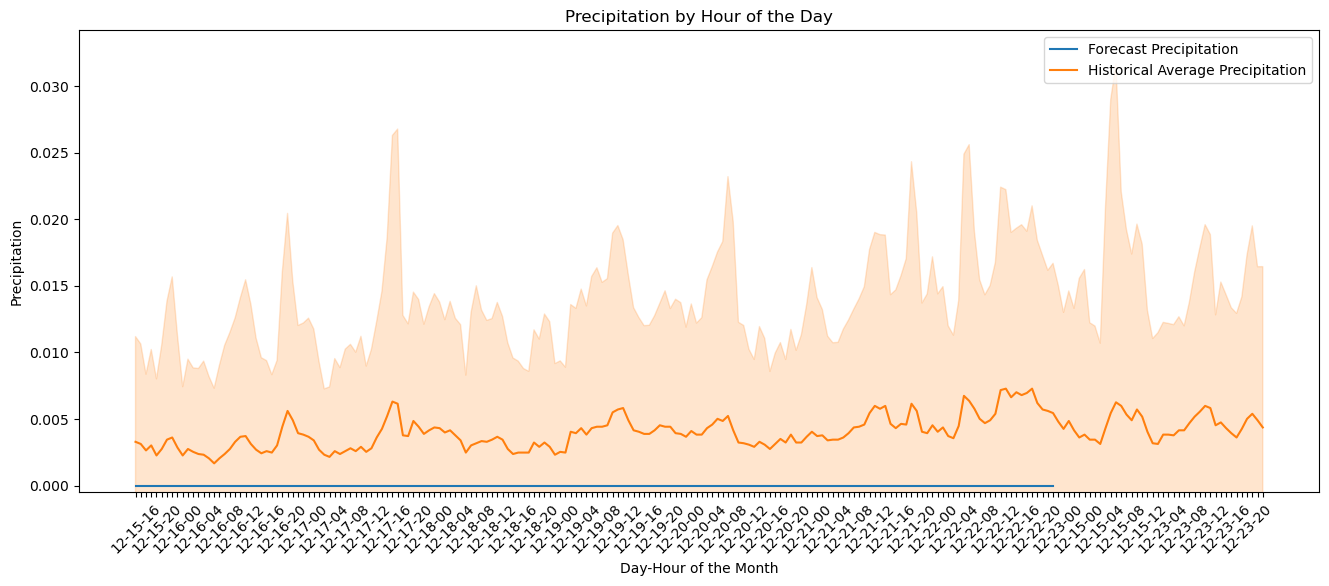

In [156]:
historical_data = pd.read_pickle(r'/Users/Davis/Documents/School/386/weather386/weather_history_csv/hourly_hist.pkl')
forecast_data = pd.read_pickle(r'/Users/Davis/Documents/School/386/weather386/forecast_csv/combined.pkl')

#compare_weather_hour_forecast(historical_data, forecast_data, 'temperature', '12-11')
#wind_graph(historical_data,forecast_data)
#temp_graph(historical_data,forecast_data)
precip_graph(historical_data,forecast_data)

In [ ]:
def compare_weather_hour_forecast(historical_df, forecast_df, value_column, target_date):
    """
    Compare historical weather data with the current forecast using a graph with a confidence interval.

    Parameters:
    - historical_df: DataFrame containing historical weather data.
    - forecast_df: DataFrame containing the current weather forecast data.
    - value_column: Name of the column in both DataFrames containing the weather variable to compare.
    - target_date: Date in the format 'MM-DD' to filter the data.

    Returns:
    - None (the function will display the graph).
    """
    
    # Format the 'date' column in historical_df and 'validTime' in forecast_df to match the target_date format
    historical_df['formatted_date'] = historical_df['date'].apply(
        lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m-%d")
    )
    forecast_df['formatted_date'] = forecast_df['validTime'].apply(
        lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S%z").strftime("%m-%d")
    )

    # Filter data for the target date
    historical_filtered = historical_df[historical_df['formatted_date'] == target_date]
    forecast_filtered = forecast_df[forecast_df['formatted_date'] == target_date]

    # Extract hour from the 'validTime' column in both DataFrames
    historical_filtered['hour'] = pd.to_datetime(historical_filtered['date']).dt.hour
    forecast_filtered['hour'] = pd.to_datetime(forecast_filtered['validTime']).dt.hour

    # Merge the DataFrames on the 'hour' column
    merged_df = pd.merge(historical_filtered, forecast_filtered, on='hour', suffixes=('_historical', '_forecast'))

    # Plotting
    sns.lineplot(x=merged_df['hour'], y=merged_df[value_column + '_historical'], label='Historical', ci=None, color='blue')
    sns.lineplot(x=merged_df['hour'], y=merged_df[value_column + '_historical'], ci='sd', color='blue', alpha=0.2)
    sns.lineplot(x=merged_df['hour'], y=merged_df[value_column + '_forecast'], label='Forecast', ci='sd', color='red')

    plt.xlabel('Hour of the Day')
    plt.ylabel(value_column)
    plt.title(f'Comparison of Historical Data and Forecast for {value_column} on {target_date}')
    plt.legend()
    plt.show()


In [ ]:
compare_weather_hour_forecast(historical_data, forecast_data, 'temperature', '12-11')


TypeError: strptime() argument 1 must be str, not Timestamp

In [ ]:
def default_graphs(historical_df, forecast_df, date_column = 'date', target_date = '12-11'):
    """
    Generate default weather comparison graphs for a specific date.

    Parameters:
    - historical_df: DataFrame containing historical weather data.
    - forecast_df: DataFrame containing the current weather forecast data.
    - date_column: Name of the column in both DataFrames containing the date information.
    - target_date: Date in the format 'MM-DD' to filter the data.

    Returns:
    - graph_list: List of generated graphs.
    """
    graph_list = []

    # Generate and show the first graph
    graph_list.append(compare_weather_day_forecast(historical_df, forecast_df, date_column, 'precipitation'))

    # Generate and show the second graph
    graph_list.append(compare_weather_hour_forecast(historical_df, forecast_df, date_column, 'windSpeed', target_date))

    # Generate and show the third graph
    graph_list.append(compare_weather_hour_forecast(historical_df, forecast_df, date_column, 'temperature', target_date))
    return graph_list

# Example usage:
# historical_data = pd.read_csv('historical_weather.csv')
# forecast_data = pd.read_csv('forecast_weather.csv')
# default_graphs(historical_data, forecast_data, 'date', '12-11')

In [ ]:
result = default_graphs(historical_data, forecast_data, 'date', '12-11')

In [ ]:
result